In [7]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.8 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 4.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.10/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os

import subprocess

import random
import re
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
filename=os.path.realpath("/Users/michaelbrown/Documents/GitHub/aig_project/result")
filename_cascade=os.path.realpath("/Users/michaelbrown/Documents/GitHub/aig_project/mks/src/build/result")
filename_sdnf=os.path.realpath("/Users/michaelbrown/Documents/GitHub/aig_project_copy/result")


FUNCTION GENERATION

In [10]:
from itertools import groupby

def check_output(sequence):
    if isinstance(sequence, (int, float)):
        sequence = str(sequence)

    groups = [list(g) for k, g in groupby(sequence)]

    k_check = len(groups[0])
    for i in range(len(groups)):
        if len(groups[i]) != k_check:
            return False
        if int(groups[i][0]) != (i + int(groups[0][0])) % 2:
            return False

    return True


In [52]:
# Пересмотренный анализ зависимости от переменных

# Поскольку минкод представляет выходы для всех возможных входных комбинаций 4 переменных,
# каждый шаг изменения одной переменной соответствует переходу между группами в минкоде

# Функция для анализа существенности переменной по индексам изменения
def check_variable_essential(mincode):
    # Инициализация массива для отслеживания существенности каждой переменной
    essential = [False, False, False, False]

    # Проходим через все комбинации переменных, сравнивая пары, где меняется только одна переменная
    for variable in range(4): # Для каждой переменной
        step = 2**variable
        for i in range(0, len(mincode), step * 2):
            for j in range(step):
                if i+j+step < len(mincode) and mincode[i+j] != mincode[i+j+step]:
                    essential[variable] = True
                    break # Прерываем внутренний цикл, если нашли изменение
            if essential[variable]:
                break # Прерываем внешний цикл, если переменная существенна

    return essential

# Проверяем существенность каждой переменной для данного минкода
essential_variables_corrected = check_variable_essential('1100110011001100')
essential_variables_corrected


[False, True, False, False]

In [47]:
def func_generation(n):
    output = [random.randint(0, 1) for _ in range(2**n)]
    output = ''.join(map(str,output))
    if(check_output(output)):
        func_generation(n)  
    else:
        with open("/Users/michaelbrown/Documents/GitHub/aig_project/src/input.txt", "w") as file:
            file.write(output)
            file.close

In [20]:
def lupanov_synthesis_toabc(n):
    result = subprocess.run([filename], shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    
    result = subprocess.run([filename], shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    result.stdout = str(n) + ' ' + str(result.stdout)[2:-3]
    
    
    output_text = result.stdout
    with open("/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output.txt", "w") as file:
        file.write(output_text)
    
    
    
    cmd = ["python3", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/aig2verilog1.py", "example", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output.txt", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov.v"]
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)


In [21]:
def cascade_synthesis_toabc(n):
    result_cascade = subprocess.run([filename_cascade], shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    result_cascade.stdout = str(n) + ' ' + str(result_cascade.stdout)[2:-3]
    
    output_cascade_text = result_cascade.stdout
    with open("/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output_cascade.txt", "w") as file:
        file.write(output_cascade_text)
    
    cmd = ["python3", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/aig2verilog1.py", "example", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output_cascade.txt", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_cascade.v"]
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)


In [41]:
def sdnf_synthesis_toabc(n):
    result_sdnf = subprocess.run([filename_sdnf], shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    
    resul_sdnft = subprocess.run([filename_sdnf], shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    result_sdnf.stdout = str(n) + ' ' + str(result_sdnf.stdout)[2:-3]
    
    
    output_text = result_sdnf.stdout
    with open("/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output_sdnf.txt", "w") as file:
        file.write(output_text)
    
    
    
    cmd = ["python3", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/aig2verilog1.py", "example", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output_sdnf.txt", "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_sdnf.v"]
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)


In [42]:
sdnf_synthesis_toabc(6)

In [35]:
result

CompletedProcess(args=['python3', '/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/aig2verilog1.py', 'example', '/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output_sdnf.txt', '/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_sdnf.v'], returncode=0, stdout=b'')

In [22]:


def append_to_dataframe(s, df=None):
    # If no DataFrame is provided, create a new one
    if df is None:
        df = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    
    # Decoding to string if it's in bytes
    if isinstance(s, bytes):
        s = s.decode('utf-8')

    # Regular expression to match the desired pattern
    pattern = re.compile(r'i/o =\s+(\d+)/\s+(\d+)\s+lat =\s+(\d+)\s+(nd|and) =\s+(\d+)\s+(?:edge =\s+\d+\s+aig\s+=\s+\d+\s+)?lev =\s+(\d+)')

    matches = pattern.findall(s)  # Find all matches

    # Extract data from matches
    data = []
    for i, (io_in, io_out, lat, nd_and, nd_and_edge_val, lev) in enumerate(matches):
        if i == 0:  # For the 'before' stats
            row = {'i/o in': io_in, 'i/o out': io_out, 'lat_before': lat, 'nd_before': nd_and_edge_val, 'lev_before': lev}
        else:  # For the 'after' stats
            row.update({'lat_after': lat, 'and_after': nd_and_edge_val, 'lev_after': lev})
    
    data.append(row)
    new_df = pd.DataFrame(data)  # Convert the data list to a DataFrame

    return pd.concat([df,new_df], ignore_index=True)


# Usage
#df1 = append_to_dataframe(analysis_lupanov, df1)
#print(df1)


                                                            #kaskadi

In [23]:

def append_to_dataframe_resyn_aig(s, df=None):
    # If no DataFrame is provided, create a new one
    if df is None:
        df = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    
    # Decoding to string if it's in bytes
    if isinstance(s, bytes):
        s = s.decode('utf-8')

    # Regular expression to match the desired pattern
    pattern = re.compile(r'i/o =\s*(\d+)/\s*(\d+)\s*lat =\s*(\d+)(?:\s+and =\s*(\d+))?(?:\s+lev =\s*(\d+))?')
    matches = pattern.findall(s)

    matches = pattern.findall(s)  # Find all matches

    # Extract data from matches
    data = []
    for i, (io_in, io_out, lat, nd_and, lev) in enumerate(matches):
        if i == 0:  # For the 'before' stats
            row = {'i/o in': io_in, 'i/o out': io_out, 'lat_before': lat, 'nd_before': nd_and, 'lev_before': lev}
        else: # For the 'after' stats
            row.update({'lat_after': lat, 'and_after': nd_and, 'lev_after': lev})
    
    data.append(row)
    new_df = pd.DataFrame(data)  # Convert the data list to a DataFrame

    return pd.concat([df,new_df], ignore_index=True)

In [24]:
def complexity_analysis(df1, df2):
    
    df_min=pd.concat([df1['and_after'].astype(float), df2['and_after'].astype(float)], axis=1).min(axis=1).astype(float)
    opti_lupa = (df1["nd_before"].astype(float)-df1["and_after"].astype(float))
    opti_casca = (df2["nd_before"].astype(float)-df2["and_after"].astype(float))
    wf =pd.DataFrame({ "lupa" :opti_lupa,"casca" :opti_casca, "min" :df_min})
    columns = wf.columns
    def pattern(c = columns):
        yield from ((v1, v2) for i, v1 in enumerate(c) for v2 in c[i + 1:])
    for name1, name2 in pattern():
        wf[f'{name1}/{name2}'] = wf[name1].div(wf[name2])
    
    df1[f'{"optilupa"}/{"lupa"}'] = opti_lupa.div(df1["and_after"].astype(float))
    df2[f'{"opticasca"}/{"casca"}'] = opti_casca.div(df2["and_after"].astype(float))
    return wf["lupa/min"].mean(), wf["casca/min"].mean(),  df1[f'{"optilupa"}/{"lupa"}'].mean(), df2[f'{"opticasca"}/{"casca"}'].mean(), df1["and_after"].astype(float).div(df_min).mean(), df2["and_after"].astype(float).div(df_min).mean()
    

In [25]:
def level_analysis(df1, df2):
    df_min=pd.concat([df1['lev_after'].astype(float), df2['lev_after'].astype(float)], axis=1).min(axis=1).astype(float)
    opti_lupa = (df1["lev_before"].astype(float)-df1["lev_after"].astype(float))
    opti_casca = (df2["lev_before"].astype(float)-df2["lev_after"].astype(float))
    wf =pd.DataFrame({ "lupa" :opti_lupa,"casca" :opti_casca, "min" :df_min})
    columns = wf.columns
    def pattern(c = columns):
        yield from ((v1, v2) for i, v1 in enumerate(c) for v2 in c[i + 1:])
    for name1, name2 in pattern():
        wf[f'{name1}/{name2}'] = wf[name1].div(wf[name2])
    
    df1[f'{"optilupa"}/{"lupa"}'] = opti_lupa.div(df1["lev_after"].astype(float))
    df2[f'{"opticasca"}/{"casca"}'] = opti_casca.div(df2["lev_after"].astype(float))
    return wf["lupa/min"].mean(), wf["casca/min"].mean(),  df1[f'{"optilupa"}/{"lupa"}'].mean(), df2[f'{"opticasca"}/{"casca"}'].mean(), df1["lev_after"].astype(float).div(df_min).mean()
    

In [26]:
def cirquit_analysis(n, k):
    df1 = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df2 = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    for i in range(1, k):
        #print(i)
        func_generation(n)
        lupanov_synthesis_toabc(n)
        analysis_lupanov = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov.v; print_stats; resyn2;print_stats'"], shell=True, capture_output=True).stdout)
        cascade_synthesis_toabc(n)
        analysis_cascade = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_cascade.v;print_stats; resyn2;print_stats'"], shell=True, capture_output=True).stdout)
        
        df1 =append_to_dataframe(analysis_lupanov, df1)
        df2 = append_to_dataframe(analysis_cascade, df2)
    #COMPLEXITY    
    return complexity_analysis(df1, df2), level_analysis(df1, df2)

In [27]:
def cirquit_analysis_new_output(n, k):
    df1 = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df2 = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    for i in range(1, k):
        #print(i)
        func_generation(n)
        lupanov_synthesis_toabc(n)
        analysis_lupanov = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov.v; print_stats; resyn2; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)
        analysis_lupanov_resyn = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig; print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)
        cascade_synthesis_toabc(n)
        analysis_cascade = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_cascade.v;print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_cascade_resyn.aig'"], shell=True, capture_output=True).stdout)
        
        df1 =append_to_dataframe(analysis_lupanov, df1)
        df2 = append_to_dataframe(analysis_cascade, df2)
    #COMPLEXITY    
    return complexity_analysis(df1, df2), level_analysis(df1, df2)

In [28]:
df1 = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
df2 = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
n = int(input())
func_generation(n)
lupanov_synthesis_toabc(n)
analysis_lupanov = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov.v; print_stats; resyn2; ps; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)
analysis_lupanov_resyn = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig; print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)
cascade_synthesis_toabc(n)
analysis_cascade = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_cascade.v;print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_cascade_resyn.aig'"], shell=True, capture_output=True).stdout)
df2 = append_to_dataframe(analysis_cascade, df2)
#COMPLEXITY 


ValueError: invalid literal for int() with base 10: ''

In [53]:
cnt = 0
df2 = append_to_dataframe_resyn_aig(analysis_lupanov_resyn, df1)
df3 =  pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
while((sum(df3["nd_before"].astype(int)-df3["and_after"].astype(int)) != 0) or not (cnt)):
    analysis_lupanov_resyn = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig; print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)
    df3 = append_to_dataframe_resyn_aig(analysis_lupanov_resyn, df1)
    cnt+=1

In [54]:
df3

,i/o in,i/o out,lat_before,nd_before,lev_before,lat_after,and_after,lev_after
0,9,1,0,293,13,0,293,13


In [55]:
df2

,i/o in,i/o out,lat_before,nd_before,lev_before,lat_after,and_after,lev_after
0,9,1,0,321,14,0,304,13


In [56]:
df4 = pd.concat([df2[['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before']],\
                 df3[['lat_after', 'and_after', 'lev_after']]], axis=1, join="inner")

df4["cnt"]=cnt

In [57]:
def create_result():
    analysis_lupanov_resyn = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig; print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)
    cnt = 0
    df3 = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df2 = append_to_dataframe_resyn_aig(analysis_lupanov_resyn, df1)
    while((sum(df3["nd_before"].astype(int)-df3["and_after"].astype(int)) != 0) or not (cnt)):
        analysis_lupanov_resyn = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig; print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)
        df3 = append_to_dataframe_resyn_aig(analysis_lupanov_resyn, df1)
        cnt+= 1
    df4 = pd.concat([df2[['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before']],\
                 df3[['lat_after', 'and_after', 'lev_after']]], axis=1, join="inner")
    df4["cnt"]=cnt
    return df4

In [58]:
create_result()

,i/o in,i/o out,lat_before,nd_before,lev_before,lat_after,and_after,lev_after,cnt
0,9,1,0,293,13,0,291,13,3


In [23]:
df3[['lat_after', 'and_after', 'lev_after']]

,lat_after,and_after,lev_after
0,0,16,5


In [24]:
sum(df3["nd_before"].astype(int)-df3["and_after"].astype(int))

0

In [25]:
cnt

1

In [26]:
cnt = 0

while(sum(df3["nd_before"].astype(int)-df3["and_after"].astype(int)) != 0):
    analysis_lupanov_resyn = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig; print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)
    df3 = append_to_dataframe_resyn_aig(analysis_lupanov_resyn, df3)
    cnt+=1


In [27]:
cnt

0

In [28]:
analysis_lupanov_resyn

'b\'ABC command line: "read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig; print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig".\\n\\n\\x1b/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn:\\x1b i/o =    5/    1  lat =    0  and =     16  lev =  5\\n\\x1b/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn:\\x1b i/o =    5/    1  lat =    0  and =     16  lev =  5\\n\''

In [29]:
analysis_lupanov_resyn = str(subprocess.run(["./abc -c 'read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig; print_stats; resyn2;print_stats; wa /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov_resyn.aig'"], shell=True, capture_output=True).stdout)


In [30]:
wt

NameError: name 'wt' is not defined

In [31]:
#Complexity
fr1 = []
fr2 = []
fr3 = []
fr4 = []
#Level
fr5 = []
fr6 = []
fr7 = []
fr8 = []
#complex_diff
fr9 = []
fr10 =[]
fr11 = []

for it in range(3, 10):
    print(it)
    wt = cirquit_analysis(it, 1)
    fr1.append(wt[0][0])
    fr2.append(wt[0][1])
    fr3.append(wt[0][2])
    fr4.append(wt[0][3])
    fr5.append(wt[1][0])
    fr6.append(wt[1][1])
    fr7.append(wt[1][2])
    fr8.append(wt[1][3])
    fr9.append(wt[0][4])
    fr10.append(wt[1][4])
    fr11.append(wt[0][5])
    
    

3
4
5
6
7
8
9


In [34]:
fr1

[nan, nan, nan, nan, nan, nan, nan]

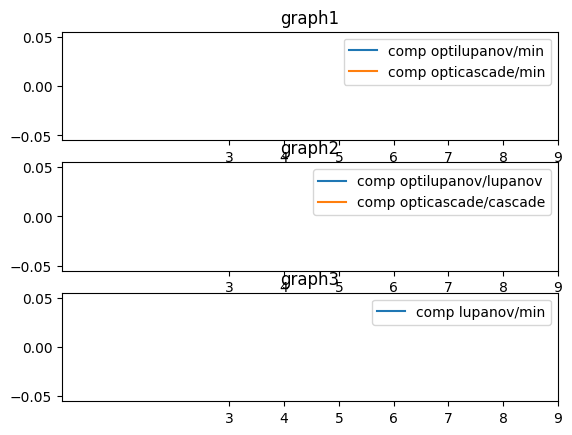

In [33]:
k = 10
#oplup/min(oplup, opcas)
#opcas/min(oplup, opcas)
#
plt.subplot(311)
plt.plot(list(range(3, k)),fr1, label="comp optilupanov/min")
plt.plot(list(range(3, k)),fr2, label="comp opticascade/min")
plt.xticks(list(range(3, k)))
plt.legend()
plt.title("graph1")
plt.subplot(312)
plt.plot(list(range(3, k)),fr3, label="comp optilupanov/lupanov")
plt.plot(list(range(3, k)),fr4, label="comp opticascade/cascade")
plt.xticks(list(range(3, k)))
plt.legend()
plt.title("graph2")
plt.subplot(313)
plt.plot(list(range(3, k)),fr9, label="comp lupanov/min")
#plt.plot(list(range(5, 10)),fr10, label="lev opticascade/cas")
plt.xticks(list(range(3, k)))
plt.legend()
plt.title("graph3")
plt.show()



ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (7,).

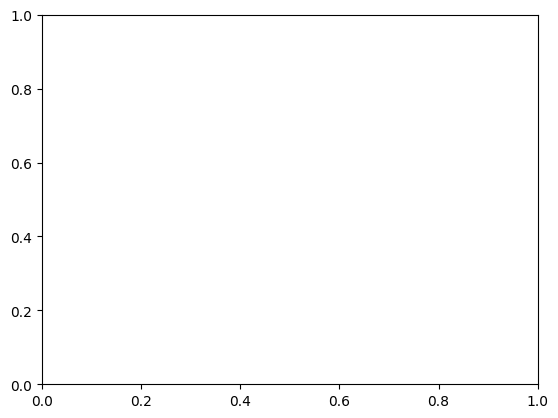

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
  

x = (range(10, 13))
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, fr11,0.4, label="cascade")
plt.bar(X_axis + 0.2, fr9,0.4, color = "orange", label="lupanov")
plt.xticks(X_axis,x)
plt.legend()
plt.title("Comparison of Cascade and Lupanov")
plt.show()
plt.show()